# Using the `Scissors()` class

## Importing the `Scissors()` class

In [1]:
from nxs_analysis_tools import Scissors
from nexusformat.nexus import NXdata, NXfield
import numpy as np

## Creating a test dataset

In [2]:
# Create an array
array_size = (100, 150, 200)
array = np.zeros(array_size)

# Create coordinates for each point in the array
x, y, z = np.meshgrid(np.linspace(0, 1, array_size[0]),
                      np.linspace(0, 1, array_size[1]),
                      np.linspace(0, 1, array_size[2]),
                      indexing='ij')

# Create a 3x3x3 grid of evenly spaced Gaussians
grid_size = (3, 3, 3)
grid_center = (0, 0, 0)
std_dev = 0.1

for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        for k in range(grid_size[2]):
            mean = ((i / (grid_size[0] - 1)),
                    (j / (grid_size[1] - 1)),
                    (k / (grid_size[2] - 1)))
            gaussian = np.exp(-((x - grid_center[0] - mean[0]) ** 2 +
                                (y - grid_center[1] - mean[1]) ** 2 +
                                (z - grid_center[2] - mean[2]) ** 2) / (2 * std_dev ** 2))
            array += gaussian

# Normalize the array
array /= np.max(array)

H=NXfield(np.linspace(-1,1,array.shape[0]), name='H')
K=NXfield(np.linspace(-1,1,array.shape[1]), name='K')
L=NXfield(np.linspace(-1,1,array.shape[2]), name='L')
data = NXdata(NXfield(array, name='counts'), (H, K, L))

## Setting up a linecut - Method 1

You can set the data, linecut center, integration window, and integration axis when you initialize the `Scissors` object.

In [3]:
scissors = Scissors(data, center=(1,1,-6), window=(0.2,0.2,2), axis=None)

## Setting up a linecut - Method 2

...or you can set them one by one after initializing the object.

In [4]:
scissors = Scissors()

In [5]:
scissors.set_data(data)

data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)


In [6]:
scissors.set_center((0,0,0))

In [7]:
scissors.set_window((0.1,0.2,1))

## Performing a linecut

You can use `.cut_data()` to perform the cut, returning an `NXdata` object.

In [8]:
linecut = scissors.cut_data()

## Plotting a linecut

The `.plot()` method of the NXdata object can be used to generate a basic plot of the linecut.

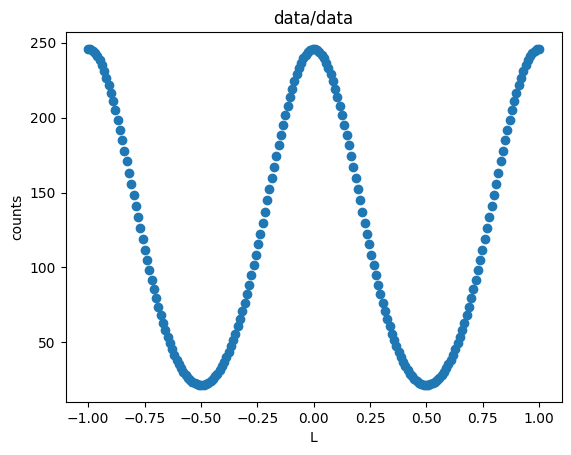

In [9]:
linecut.plot()

## Visualizing the integration window

The `.integration_window` attribute stores a `tuple` of `slice` objects over which the integration was performed.

In [10]:
scissors.integration_window

(slice(-0.1, 0.1, None), slice(-0.2, 0.2, None), slice(-1.0, 1.0, None))

To show where the integration was performed, use the `.show_integration_window()` method.

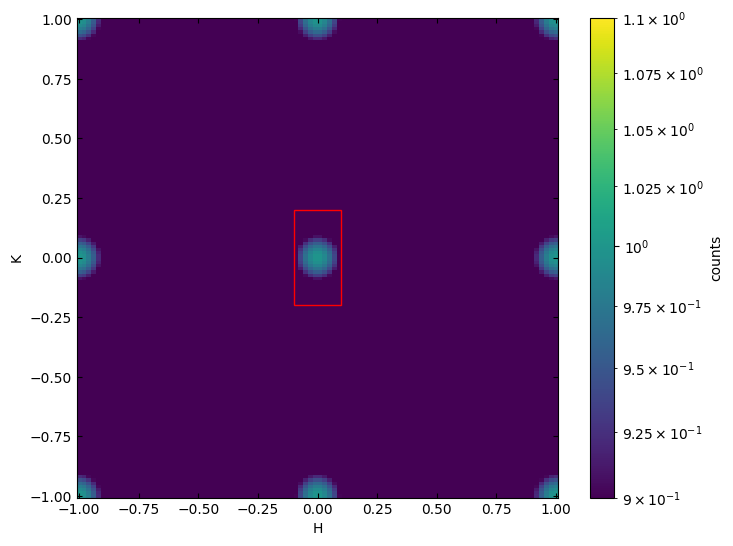

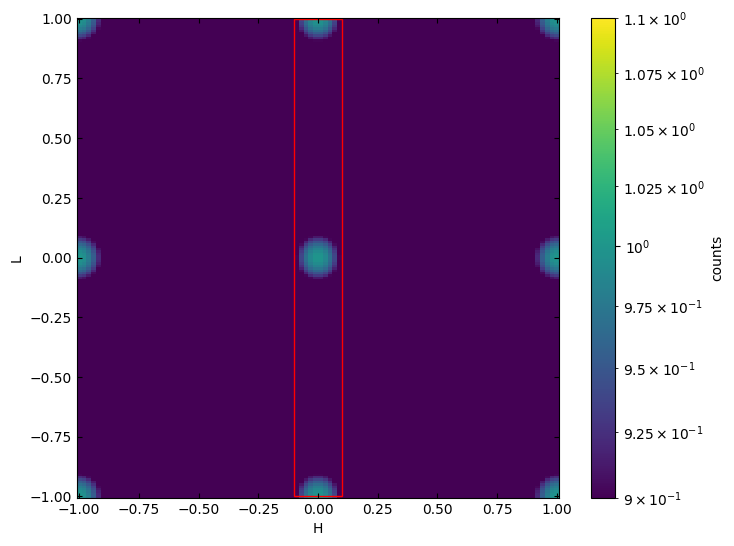

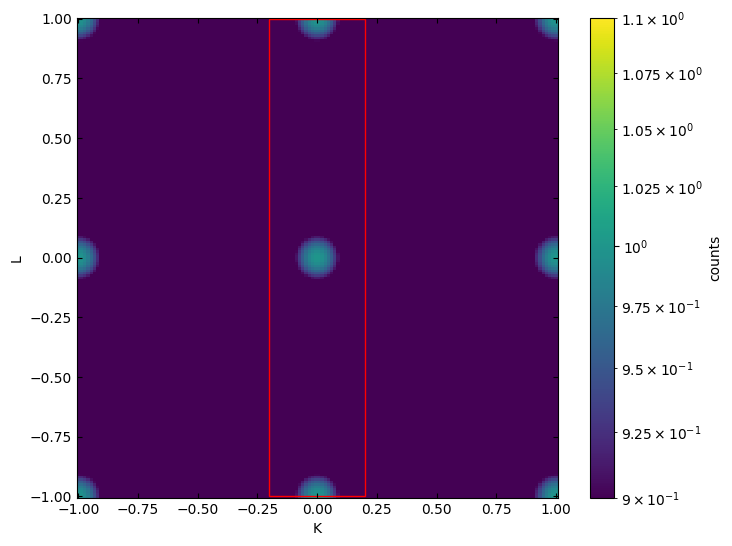

(<matplotlib.collections.QuadMesh at 0x1655b733f10>,
 <matplotlib.collections.QuadMesh at 0x16561f034c0>)

In [11]:
scissors.show_integration_window()